<a href="https://colab.research.google.com/github/alexloaeza12/Simulaci-n-I/blob/main/M%C3%A9rodo%3AComposic%C3%AD%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Composición

El ejemplo incluiye:

- Gráfica de la función de densidad de probabilidad (fdp).
- Gráfica de la función acumulativa.
- Histograma de la muestra generada.
- Notas y aclaraciones documentadas.


---



---

Importamos la librarías necesarias

In [1]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.integrate import quad

Verificación de que la fdp es una función válida
- Verificamos que la integral de 0 a 1, sea 1.

In [4]:
# Definimos las funciones de densidad de probabilidad

def fdp(x):
    return np.exp(-np.abs(2 * x))

# Verificamos que la integral de la fdp de -∞ a ∞ sea 1
integral, _ = quad(fdp, -np.inf, np.inf)
print(f'Integral de la fdp de -∞ a ∞: {integral}')  # Debe ser 1

Integral de la fdp de -∞ a ∞: 0.9999999999999999


Procedemos con el método
- Gráficamos de la función de densidad de probabilidad (fdp).

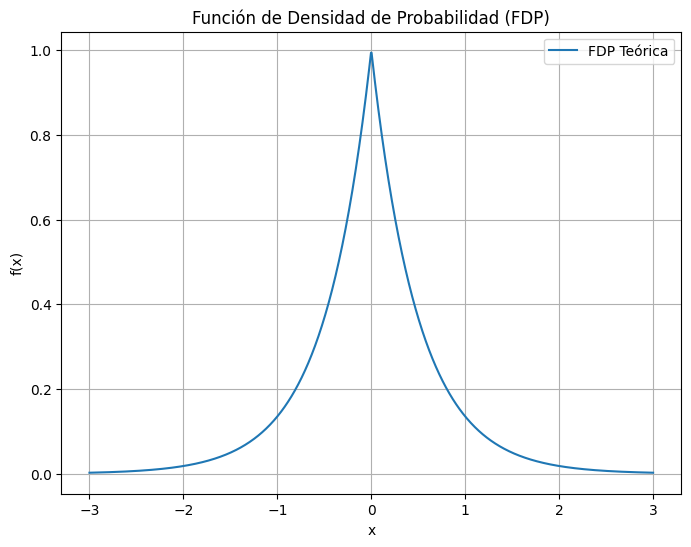

In [6]:
lista = []
for _ in range(10000):
    u = random.random()  # Generar un valor uniforme en [0, 1)
    if u <= 0.5:
        x = -0.5 * np.log(2 * u)  # Componente para x < 0
    else:
        x = 0.5 * np.log(2 * (1 - u))  # Componente para x >= 0
    lista.append(x)

x_vals = np.linspace(-3, 3, 1000)
fdp_vals = fdp(x_vals)

# Graficamos la fdp teórica
plt.figure(figsize=(8, 6))
plt.plot(x_vals, fdp_vals, label='FDP')
plt.title('Función de Densidad de Probabilidad (FDP)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Graficamos el histograma de la muestra generada


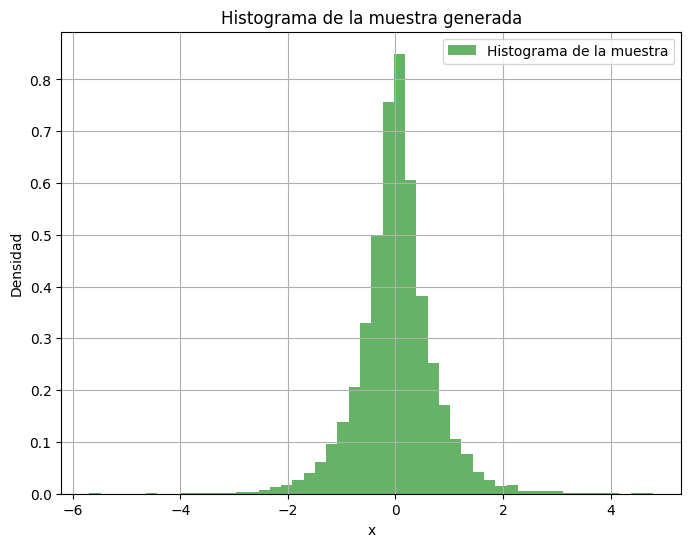

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(lista, bins=50, density=True, alpha=0.6, color='g', label='Histograma de la muestra')
plt.title('Histograma de la muestra generada')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

Gráficamos de la función de densidad de probabilidad (fdp).




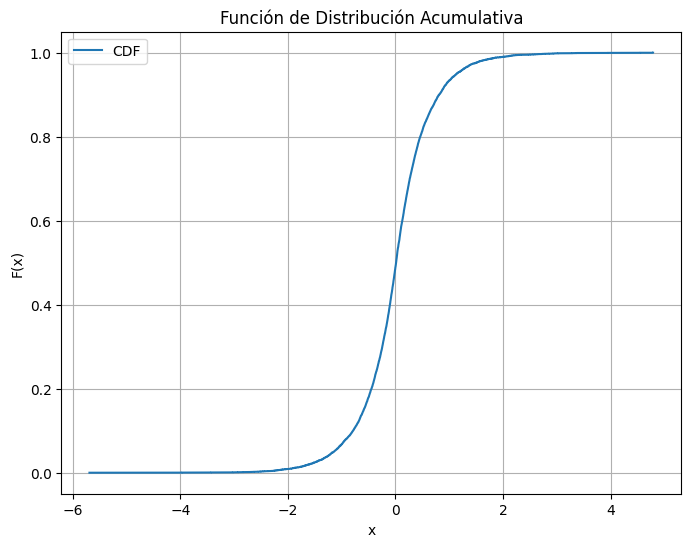

In [10]:
def cdf(muestra):
    n = len(muestra)
    x = np.sort(muestra)
    y = np.arange(1, n + 1) / n
    return x, y

X, Y = cdf(lista)

# Graficamos la función acumulativa
plt.figure(figsize=(8, 6))
plt.step(X, Y, where='post', label='CDF')
plt.title('Función de Distribución Acumulativa')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()